**Sidratul Tanzila Tasmi
<br> 190041138**

Import necessary libraries

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

1

a

Initially we create the noisy signal as given on textbook.

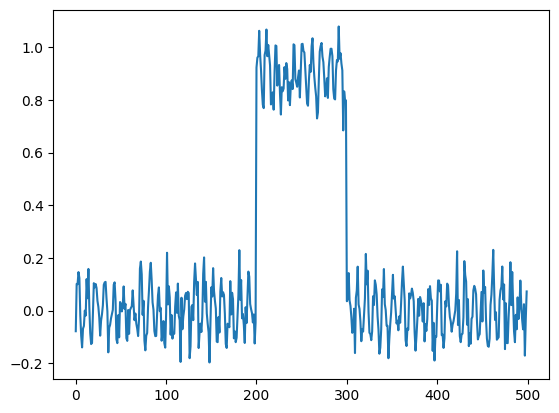

In [ ]:
time=np.linspace(0, 100 * math.pi, 500)
signal = 0.1 * np.sin(np.linspace(0, 100 * math.pi, 500))
for i in range(200, 300):
    signal[i] += 0.9
noise = np.random.normal(0, 0.05, 500)
noisy_signal= signal+noise
plt.plot(noisy_signal)
plt.show()

After that with the signal, we create a noise and add the noise to the original signal. Then we plot the noisy signal.

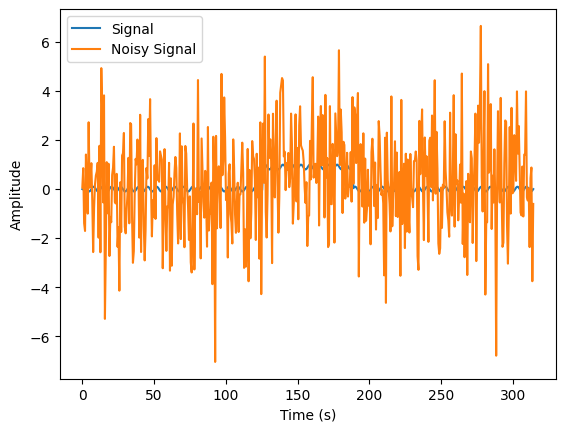

In [ ]:
noise_amplitude = 2  # arbitrary units
noise = noise_amplitude * np.random.normal(0,1,500)
noisy_signal = signal + noise

# Plot the signals
fig, ax = plt.subplots()
ax.plot(time, signal, label='Signal')
ax.plot(time, noisy_signal, label='Noisy Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
plt.show()

This is the moving average filter in the time complexity of O(n^2). In this case, for each index of the signal, we took a second array within the range from the index to the window_size which was given through the start and stop range. After that the corresponding values are added and we divide each index with the window_size to find the overall mean. 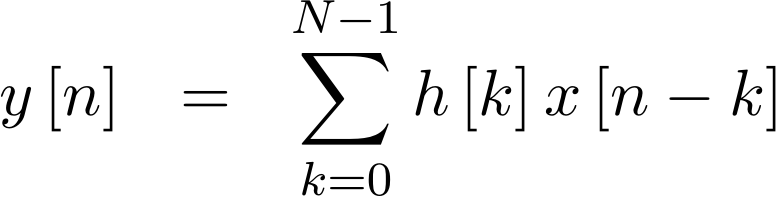

In [ ]:
def maf(x, window_size):

  n = len(x)
  y = np.zeros(n)
  for i in range(n):
      count = 0
      start=max(0,i-window_size+1)
      stop=min(n, i+1)
      for j in range(start, stop):
          y[i] += x[j]
          if j >= window_size:
            y[i] -= x[j - window_size]
          count += 1
      y[i] /= window_size
  return y




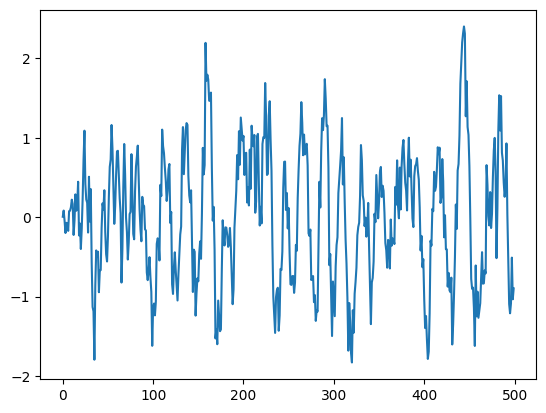

In [ ]:
y = maf(noisy_signal, 11)
plt.plot(y)
plt.show()

b.

Here in this case we compared the performance of the moving average signal with different window size. We can see the signal becomes more smooth with greater window size.

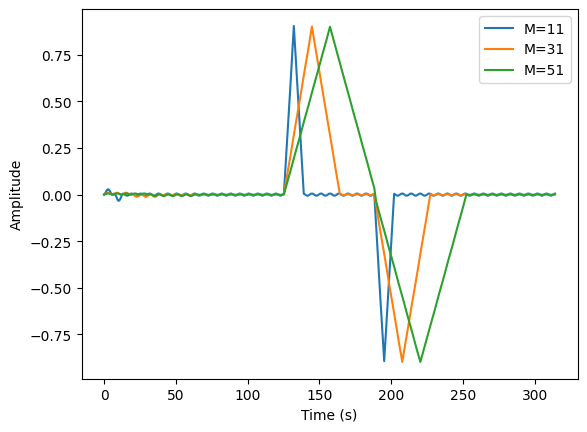

In [ ]:
y1 = maf(signal, 11)
y2 = maf(signal, 31)
y3 = maf(signal, 51)
fig, ax = plt.subplots()
ax.plot(time, y1, label='M=11')
ax.plot(time, y2, label='M=31')
ax.plot(time, y3, label='M=51')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
plt.show()

3.

In [ ]:
one = maf(signal, 51)
two = maf(one, 51)
three = maf(two, 51)
four = maf(three, 51)
onep_fr = np.sqrt(np.fft.rfft(one).real ** 2 + np.fft.rfft(one).imag ** 2)
twop_fr = np.sqrt(np.fft.rfft(two).real ** 2 + np.fft.rfft(two).imag ** 2)
fourp_fr = np.sqrt(np.fft.rfft(four).real ** 2 + np.fft.rfft(four).imag ** 2)
onep_sr = np.cumsum(one)
twop_sr = np.cumsum(two)
fourp_sr = np.cumsum(four)
onep_frdb = 20 * np.log(onep_fr)
twop_frdb = 20 * np.log(twop_fr)
fourp_frdb = 20 * np.log(fourp_fr)

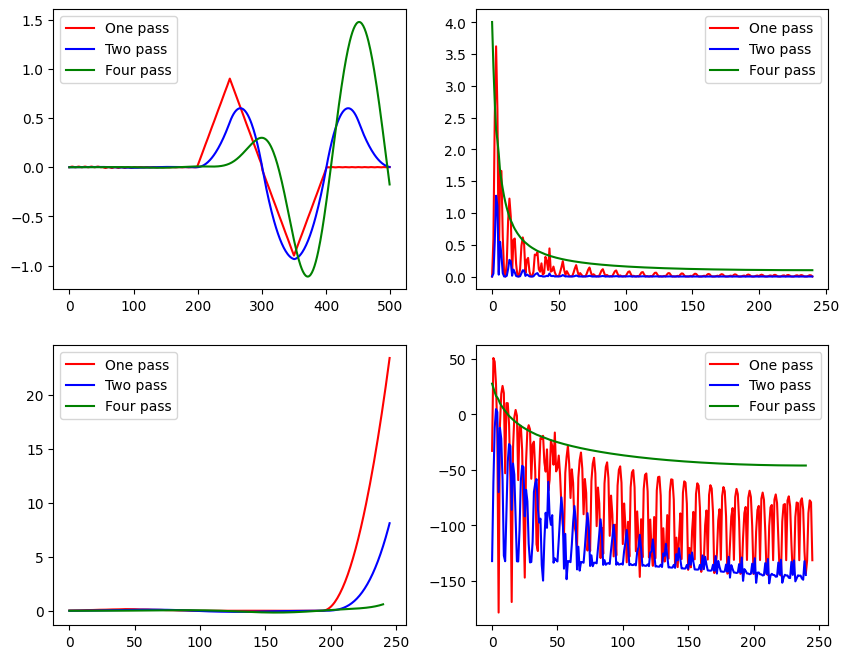

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(one, 'r', label="One pass")
plt.plot(two, 'b', label="Two pass")
plt.plot(four, 'g', label="Four pass")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(onep_fr[np.arange(10, len(onep_fr))], 'r', label="One pass")
plt.plot(twop_fr[np.arange(10, len(twop_fr))], 'b', label="Two pass")
plt.plot(fourp_fr[np.arange(10, len(fourp_fr))], 'g', label="Four pass")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(onep_sr[np.arange(5, len(onep_fr))], 'r', label="One pass")
plt.plot(twop_sr[np.arange(5, len(twop_fr))], 'b', label="Two pass")
plt.plot(fourp_sr[np.arange(10, len(fourp_fr))], 'g', label="Four pass")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(onep_frdb[np.arange(5, len(onep_fr))], 'r', label="One pass")
plt.plot(twop_frdb[np.arange(10, len(twop_fr))], 'b', label="Two pass")
plt.plot(fourp_frdb[np.arange(10, len(fourp_fr))], 'g', label="Four pass")
plt.legend()

2

The frequency response of the signal was calculated through the formula given on book. We also considered that signal can go negative index in line number 5.

In [ ]:
def freq_response(M):
    t = np.linspace(0, 0.5, 100) #Half of the frequency sampling rate
    H = np.sin(math.pi * t * M)/(M * np.sin(math.pi * t))

    H[H<0]=-H[H<0]
    return H, t

<ipython-input-89-9ad19221012a>:3: RuntimeWarning: invalid value encountered in true_divide
  H = np.sin(math.pi * t * M)/(M * np.sin(math.pi * t))


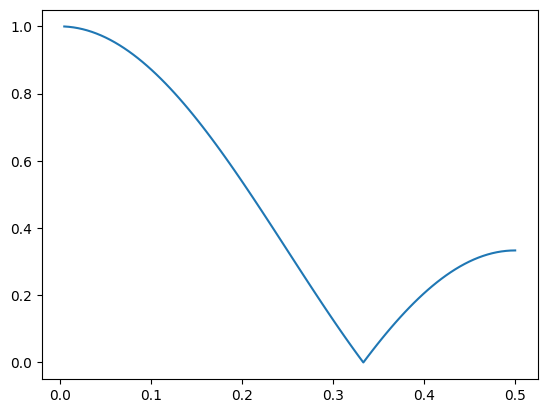

In [ ]:
H, t = freq_response(3)
plt.plot(t, H)

<ipython-input-89-9ad19221012a>:3: RuntimeWarning: invalid value encountered in true_divide
  H = np.sin(math.pi * t * M)/(M * np.sin(math.pi * t))


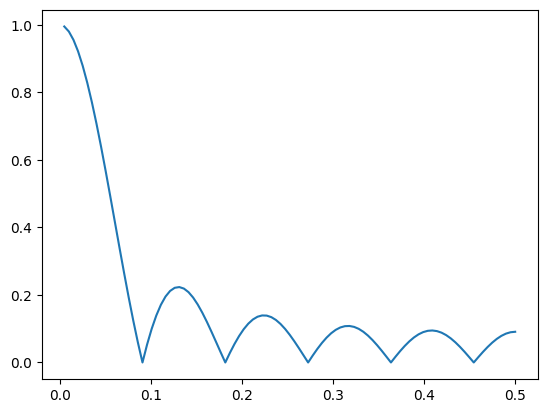

In [ ]:
H, t = freq_response(11)
plt.plot(t, H)

<ipython-input-89-9ad19221012a>:3: RuntimeWarning: invalid value encountered in true_divide
  H = np.sin(math.pi * t * M)/(M * np.sin(math.pi * t))


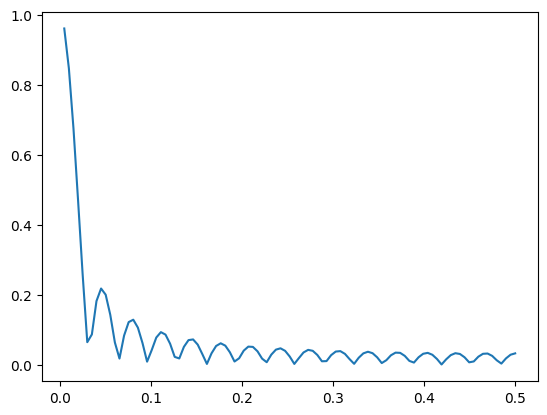

In [ ]:
H, t = freq_response(31)
plt.plot(t, H)

For each size of window length we calculated the frequency response here.

4

In order to do linear operation, instead of iterating the whole array for each index , we just subtracted the previous index outside the window range and added the next one. This reduced the overall calculation.

In [ ]:
def maf2(x, M):
  l=x.shape
  y = np.zeros(l)
  low = M//2
  s = 0
  for i in range(M):
    s += x[i]
  y[low] = s/M

  for i in range(low+1, x.shape[0]-low):
      s = s + x[i + low] - x[i - (low + 1)]
      y[i] = s / M

  return y

 5.

The sinc function is usually used to reconstruct a bandwidth limited signal. We have constructed it using the formula given on book.
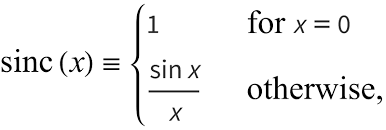

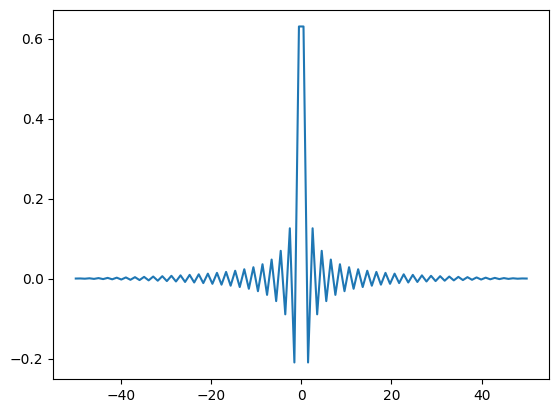

In [ ]:
def sinc(fc):
    t = np.linspace(-50, 50, 100)
    H = np.sin(2 * math.pi * fc * t)/(t * math.pi)
    return H, t
H, t = sinc(0.5)
plt.plot(t, H)

6

In this case we took the fourier transform of the sync signal as well as its truncated version as instructed in the question. After that we plotted the magnitude of the polar notation of the frequency response for comparison.

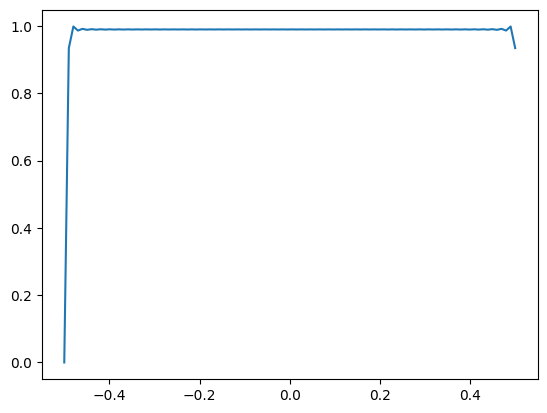

In [ ]:
fft = np.fft.fft(H)
magX = abs(np.fft.fftshift(fft))

plt.plot(np.linspace(-.5, 0.5, len(magX)), magX)
plt.show()

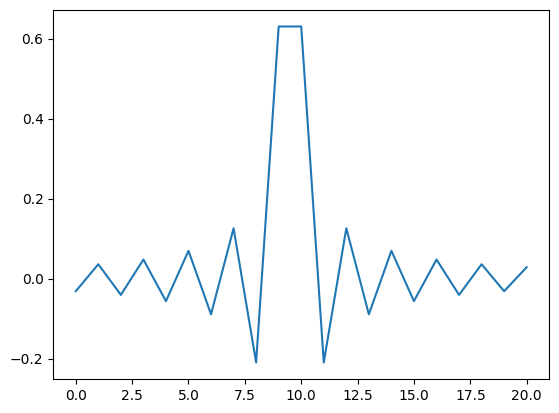

In [ ]:

center = len(H) // 2
truncated_signal = H[center - 20 // 2 : center + 20 // 2 + 1]
plt.plot(truncated_signal)
plt.show()

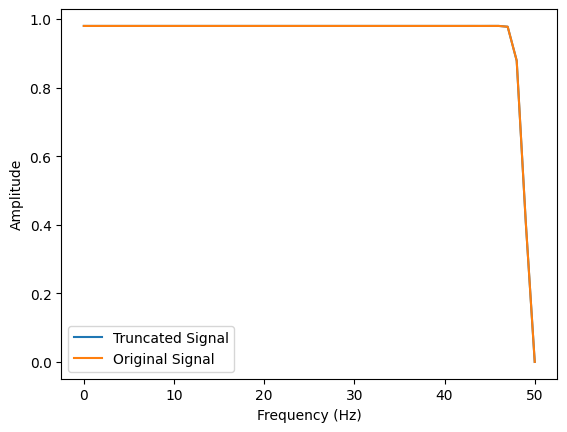

In [ ]:
blackman = np.blackman(len(H))
hamming = np.blackman(len(H))
H1 = H * blackman
H2 = H * hamming
fig, ax = plt.subplots()
freq = np.fft.rfft(H1)
f2=freq.real*freq.real+ freq.imag*freq.imag
freq = np.fft.rfft(H2)
f1=freq.real*freq.real+ freq.imag*freq.imag
ax.plot(f2, label='Truncated Signal')
ax.plot(f1, label='Original Signal')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
ax.legend()
plt.show()

7.

We used built in Hammin and blackman window function.

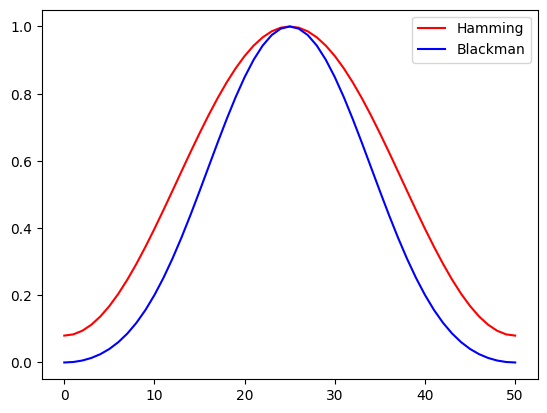

In [ ]:
plt.plot(np.hamming(51), 'r', label="Hamming")
plt.plot(np.blackman(51), 'b', label="Blackman")
plt.legend()
plt.show()

8.

The formula for blackman and hamming window was given on the book which we used to construct the signal. 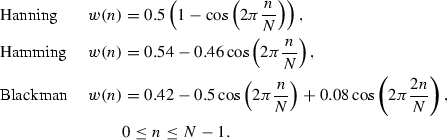

In [ ]:
def blackman_window(n):

    a0 = 0.42659
    a1 = 0.49656
    a2 = 0.076849
    pi = np.pi
    n_values = np.arange(n)
    w = a0 - a1*np.cos(2*pi*n_values/(n-1)) + a2*np.cos(4*pi*n_values/(n-1))
    return w

In [ ]:
def hamming_window(n):
    """
    Compute the Hamming window of length n.
    """
    alpha = 0.54
    beta = 1 - alpha
    pi = np.pi
    n_values = np.arange(n)
    w = alpha - beta * np.cos(2 * pi * n_values / (n - 1))
    return w

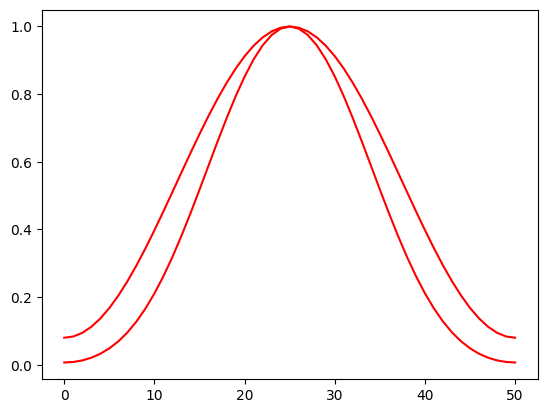

In [ ]:
plt.plot(blackman_window(51), 'r', label="Blackman_Window")
plt.plot(hamming_window(51), 'r', label="Hamming_Window")